Synopsis:
The project titled "The Perfect Storm: Understanding the 2008 Housing Market Collapse" aims to provide a comprehensive analysis of the factors that led to the dramatic collapse of the housing market in the United States. It will explore the key elements that contributed to the bubble, including risky lending practices, the rise of subprime mortgages, and the proliferation of adjustable-rate loans. By examining historical data on housing prices and foreclosure rates, the project will illustrate the unsustainable growth of the housing market during the early 2000s.
In addition to the economic factors, the project will delve into the regulatory environment and government policies that allowed these risky practices to flourish, highlighting the role of financial institutions and credit rating agencies.
Finally, the project will draw lessons from the crisis to inform current housing policies and financial regulations, advocating for a more transparent and stable housing market. Through a blend of data analysis, historical context, and expert insights, this project aims to enhance understanding of one of the most significant economic events of the 21st century.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#hpi datasets - summary HPI
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/hpi_po_summary.csv')
df.head()
df[' Year '] = pd.to_numeric(df[' Year '], errors='coerce')
df = df[(df[' Year '] >= 2000) & (df[' Year '] <= 2015)]

In [ ]:
#Summary HPI for 2000 - 2006
df[' Year '] = pd.to_numeric(df[' Year '], errors='coerce')
df_prior = df[(df[' Year '] >= 2000) & (df[' Year '] <= 2006)]
df_prior = df_prior.reset_index(drop=True)
df_prior.head()


,Region,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),Not Seasonally-Adjusted\nPurchase-Only Index\n% Change Over \nPrevious Quarter,Seasonally-Adjusted Purchase-Only Index\n% Change Over \nPrevious Quarter,Not Seasonally-Adjusted\nPurchase-Only Index\n% Change Over \nPrevious 4 Quarters,Seasonally-Adjusted Purchase-Only Index\n% Change Over \nPrevious 4 Quarters
0,USA,2000,1,136.38,136.52,1.53%,1.76%,6.42%,6.44%
1,USA,2000,2,139.83,138.81,2.53%,1.67%,6.64%,6.63%
2,USA,2000,3,142.19,140.99,1.68%,1.57%,6.69%,6.67%
3,USA,2000,4,143.64,143.44,1.02%,1.74%,6.93%,6.92%
4,USA,2001,1,145.91,146.10,1.58%,1.85%,6.98%,7.01%


In [ ]:
#I think this data would be ideal for the map we could use %change in 2006 as the color code object
df_state = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/hpi_state.csv')
df_state = df_state[(df_state['Year'] >= 2000) & (df_state['Year'] <= 2015)]
df_state.head(10)

,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Unnamed: 8
25,Alabama,AL,1,2000,3.26,282.57,137.86,100.00,NaN
26,Alabama,AL,1,2001,4.15,294.28,143.58,104.15,NaN
27,Alabama,AL,1,2002,2.16,300.64,146.68,106.39,NaN
28,Alabama,AL,1,2003,2.30,307.54,150.04,108.84,NaN
29,Alabama,AL,1,2004,3.32,317.76,155.03,112.45,NaN
30,Alabama,AL,1,2005,6.87,339.60,165.69,120.18,NaN
31,Alabama,AL,1,2006,7.88,366.35,178.74,129.65,NaN
32,Alabama,AL,1,2007,4.12,381.43,186.10,134.99,NaN
33,Alabama,AL,1,2008,0.84,384.65,187.66,136.13,NaN
34,Alabama,AL,1,2009,-2.33,375.67,183.29,132.95,NaN


In [ ]:
df_prior.to_csv('hpi_summary_2000_2006.csv', index=False)


In [ ]:
# prompt: Using dataframe df_state_prior: create a map of us with Annual % change

import plotly.express as px

# Assuming 'Annual Change (%)' is a string column, convert it to numeric
df_state['Annual Change (%)'] = pd.to_numeric(df_state['Annual Change (%)'], errors='coerce')

# Filter for a specific year (e.g., 2006)
df_2006 = df_state[df_state.Year == 2006]

# Create a choropleth map
fig = px.choropleth(df_2006,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Annual Change (%)',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Annual % Change by State (2006)')

fig.show()
fig.write_html('choropleth_map_2007.html')


In [ ]:
# Filter for a specific year (e.g., 2007)
df_2007 = df_state[df_state.Year == 2007]

# Create a choropleth map
fig = px.choropleth(df_2007,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Annual Change (%)',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Annual % Change by State (2007)')

fig.show()
fig.write_html('choropleth_map_2010.html')


In [ ]:
# Filter for a specific year (e.g., 2008)
df_2008 = df_state[df_state.Year == 2008]

# Create a choropleth map
fig = px.choropleth(df_2008,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Annual Change (%)',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Annual % Change by State (2008)')

fig.show()

In [ ]:
# Filter for a specific year (e.g., 2009)
df_2009 = df_state[df_state.Year == 2009]

# Create a choropleth map
fig = px.choropleth(df_2009,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Annual Change (%)',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Annual % Change by State (2009)')

fig.show()

In [ ]:
# Filter for a specific year (e.g., 2010)
df_2010 = df_state[df_state.Year == 2010]

# Create a choropleth map
fig = px.choropleth(df_2010,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Annual Change (%)',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Annual % Change by State (2010)')

fig.show()


<ipython-input-36-aca4b9c81683>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



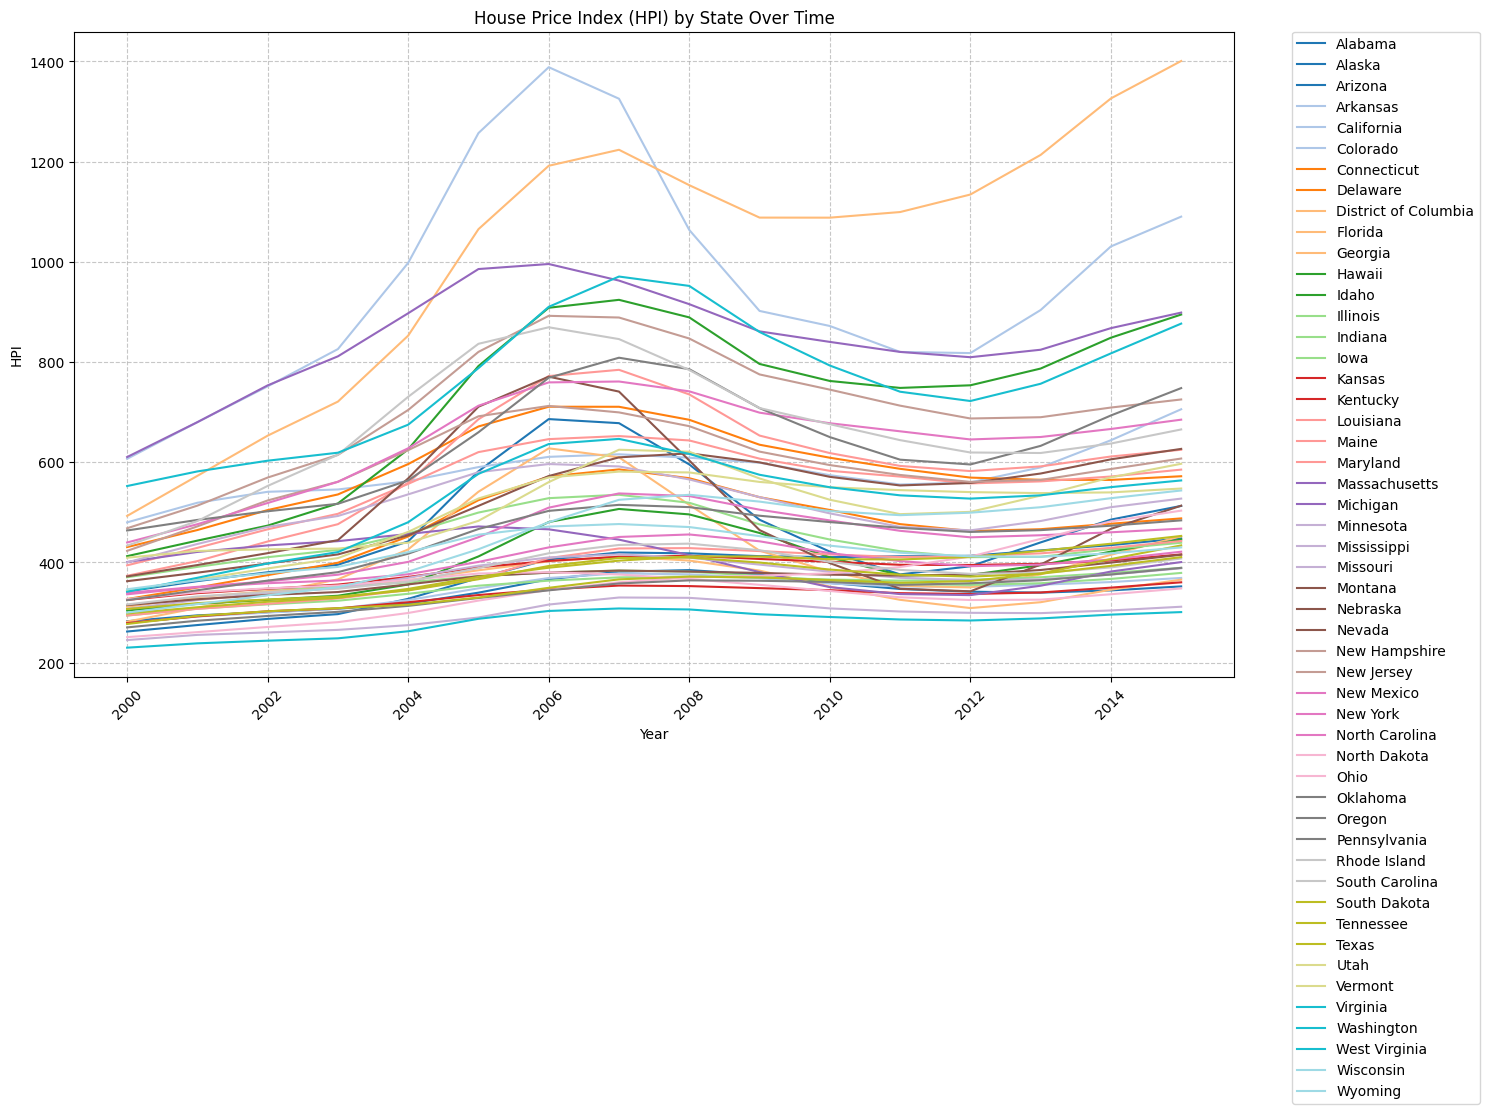

In [ ]:
#here is a line plot for HPI for each year for each state (I think this will be better as a map)
fig, ax = plt.subplots(figsize=(15, 10))

states = df_state['State'].unique()
color_map = plt.cm.get_cmap('tab20')  # You can change 'tab20' to other colormaps if needed

for i, state in enumerate(states):
    state_data = df_state[df_state['State'] == state]
    ax.plot(state_data['Year'], state_data['HPI'], label=state, color=color_map(i/len(states)))

ax.set_xlabel('Year')
ax.set_ylabel('HPI')
ax.set_title('House Price Index (HPI) by State Over Time')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df_state.to_csv('HousePriceIndexByState.csv', index=False)


In [ ]:
df_inv = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/Total_house_inv.csv')
df_inv['DateTime'] = pd.to_datetime(df_inv['Year'].astype(str) + '-' + (df_inv['Quarter'] * 3).astype(str) + '-01')
df_inv

,Year,Quarter,AllHousingUnits,Vacant,TotalOccupied,RenterOccupied,DateTime
0,2000,1,119105,13812,105293,34592,2000-03-01
1,2000,2,119481,14185,105296,34538,2000-06-01
2,2000,3,119785,13985,105800,34163,2000-09-01
3,2000,4,120144,13651,106493,34587,2000-12-01
4,2001,1,121148,14354,106794,34663,2001-03-01
...,...,...,...,...,...,...,...
59,2014,4,133453,16806,116647,42041,2014-12-01
60,2015,1,133575,17335,116240,42222,2015-03-01
61,2015,2,134603,17317,117286,42878,2015-06-01
62,2015,3,134797,17443,117353,42609,2015-09-01


In [ ]:
df_inv.to_csv('Total_house_inv.csv', index=False)

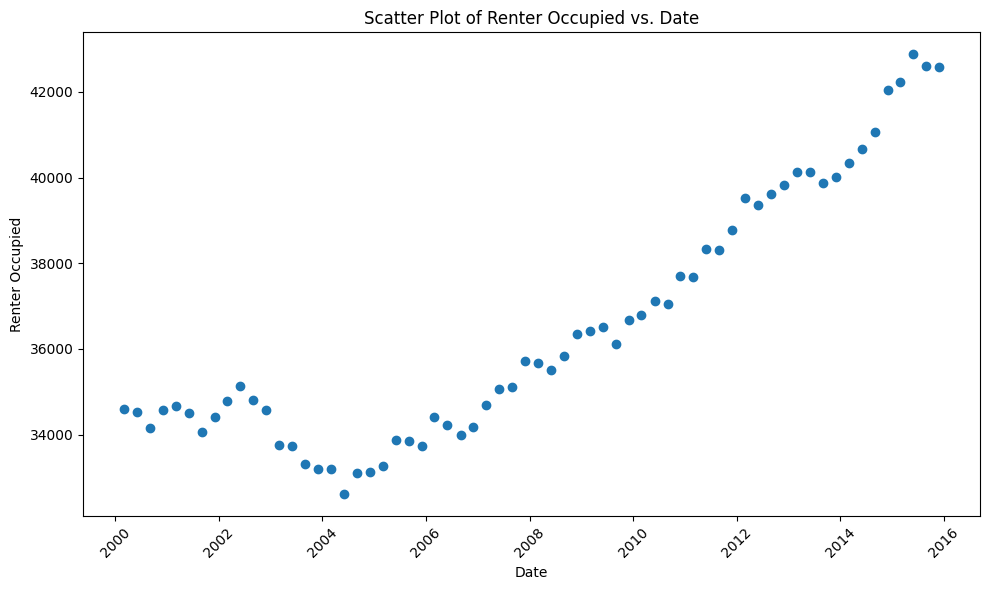

In [ ]:
# prompt: Using dataframe df_inv: create scatterplot of renteroccupied and datetime using matplotlib

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df_inv['DateTime'], df_inv['RenterOccupied'])

# Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Renter Occupied')
plt.title('Scatter Plot of Renter Occupied vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()


In [ ]:
# Calculate renter occupied percent
df_inv['RenterOccupiedPercent'] = (df_inv['RenterOccupied'] / df_inv['AllHousingUnits']) * 100

# Calculate vacant percent
df_inv['VacantPercent'] = (df_inv['Vacant'] / df_inv['AllHousingUnits']) * 100

# Calculate owner occupied percent
df_inv['OwnerOccupiedPercent'] = (df_inv['TotalOccupied'] - df_inv['RenterOccupied']) / df_inv['AllHousingUnits'] * 100

# Group by year and display the results
df_inv_grouped = df_inv.groupby('Year').agg({'RenterOccupiedPercent':'mean', 'VacantPercent':'mean', 'OwnerOccupiedPercent':'mean'})
df_inv_grouped

,RenterOccupiedPercent,VacantPercent,OwnerOccupiedPercent
Year,,,
2000,28.814547,11.626489,59.558964
2001,28.331310,11.911805,59.756885
2002,28.241710,11.984790,59.773500
2003,27.730355,12.640197,59.629448
2004,27.018649,12.767304,60.214047
2005,27.175766,12.664471,60.159763
2006,27.137354,13.043435,59.819013
2007,27.466959,13.795369,58.737672
2008,27.546943,14.375520,58.077730


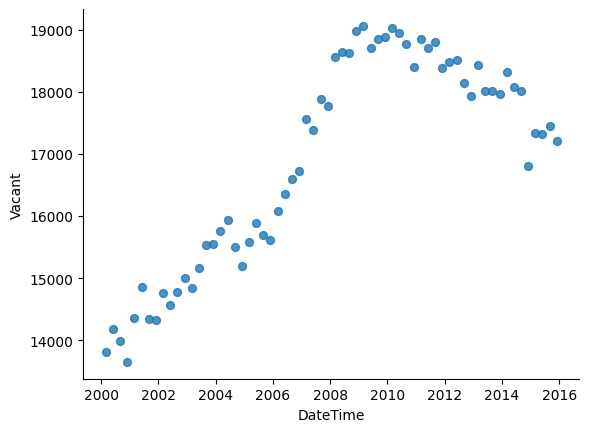

In [ ]:
# Vacant vs DateTime

from matplotlib import pyplot as plt
df_inv.plot(kind='scatter', x='DateTime', y='Vacant', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

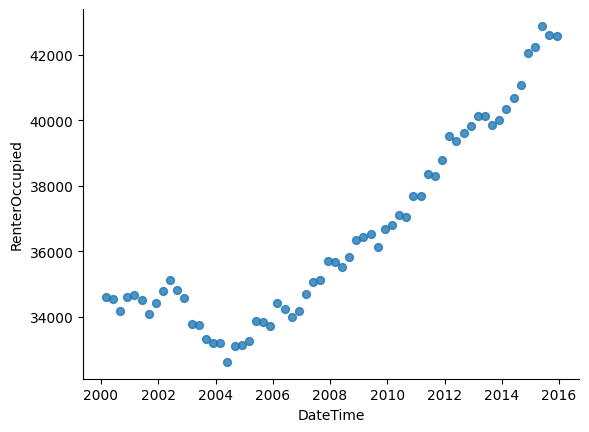

In [ ]:
# Renter Occupied vs DateTime

from matplotlib import pyplot as plt
df_inv.plot(kind='scatter', x='DateTime', y='RenterOccupied', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_foreclosure = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/Foreclosure.csv')
df_foreclosure

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,1/1/2000,4.03,8.26,12935.252,1.95,101.34
1,4/1/2000,3.93,8.32,13170.749,1.97,103.67
2,7/1/2000,4.00,8.02,13183.890,2.09,105.79
3,10/1/2000,3.90,7.62,13262.250,2.23,108.27
4,1/1/2001,4.23,7.01,13219.251,2.34,110.48
...,...,...,...,...,...,...
79,10/1/2019,3.60,3.70,19202.310,2.34,212.47
80,1/1/2020,3.80,3.52,18951.992,2.36,215.51
81,4/1/2020,13.07,3.24,17258.205,2.55,217.89
82,7/1/2020,8.80,2.95,18560.774,2.80,222.84


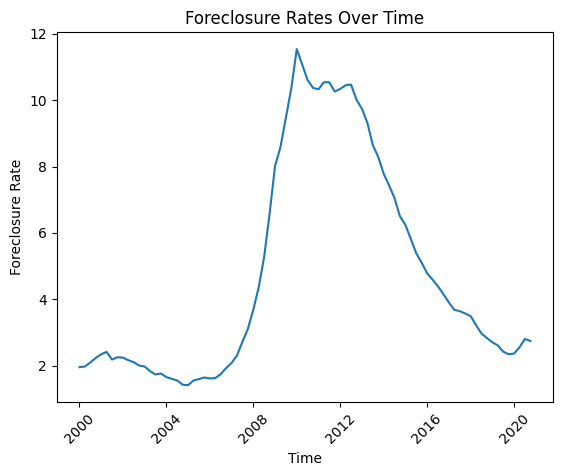

In [ ]:

# Convert 'DATE' column to datetime objects if it's not already
df_foreclosure['DATE'] = pd.to_datetime(df_foreclosure['DATE'])

# Create the line plot
plt.plot(df_foreclosure['DATE'], df_foreclosure['FORECLOSURES'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Foreclosure Rate')
plt.title('Foreclosure Rates Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
df_foreclosure.to_csv('foreclosure.csv', index=False)

In [ ]:
#Consumer Credit Change: The difference in total consumer credit outstanding between two time periods,
#expressed as a dollar amount in Billions.
df_c_credit = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/consumer_credit.csv')
df_c_credit
df_c_credit.head()

,Country,Category,DateTime,Close,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Consumer Credit,2000-01-31T00:00:00,7.41,Monthly,UNITEDSTACONCRE,2019-04-09T13:52:00
1,United States,Consumer Credit,2000-02-29T00:00:00,10.67,Monthly,UNITEDSTACONCRE,2019-04-09T13:52:00
2,United States,Consumer Credit,2000-03-31T00:00:00,12.27,Monthly,UNITEDSTACONCRE,2019-04-09T13:52:00
3,United States,Consumer Credit,2000-04-30T00:00:00,9.08,Monthly,UNITEDSTACONCRE,2019-04-09T13:52:00
4,United States,Consumer Credit,2000-05-31T00:00:00,12.98,Monthly,UNITEDSTACONCRE,2019-04-09T13:52:00


In [ ]:
df_c_price = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/consumer_price_index.csv')
df_c_price.rename(columns={'Close': 'CPI'}, inplace=True)
df_c_price.head()

,Country,Category,DateTime,CPI,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Consumer Price Index CPI,2000-01-31T00:00:00,168.8,Monthly,UNITEDSTACONPRIINDCP,2022-06-17T11:01:00
1,United States,Consumer Price Index CPI,2000-02-29T00:00:00,169.8,Monthly,UNITEDSTACONPRIINDCP,2022-06-17T11:01:00
2,United States,Consumer Price Index CPI,2000-03-31T00:00:00,171.2,Monthly,UNITEDSTACONPRIINDCP,2022-06-17T11:01:00
3,United States,Consumer Price Index CPI,2000-04-30T00:00:00,171.3,Monthly,UNITEDSTACONPRIINDCP,2022-06-17T11:01:00
4,United States,Consumer Price Index CPI,2000-05-31T00:00:00,171.5,Monthly,UNITEDSTACONPRIINDCP,2022-06-17T11:01:00


In [ ]:
df_c_price.to_csv('consumer_price_index.csv', index=False)

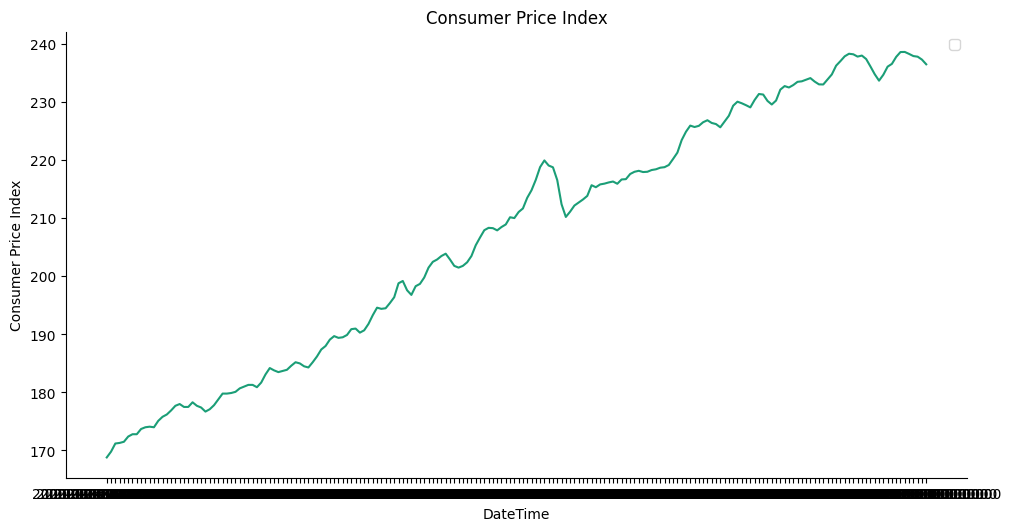

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateTime']
  ys = series['CPI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_c_price.sort_values('DateTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateTime')
_ = plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index')
plt.legend()
plt.show()

In [ ]:
df_c_spending = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/consumer_spending.csv')
df_c_spending.rename(columns={'Close': 'consumer_spending'}, inplace=True)
df_c_spending.head()
#

,Country,Category,DateTime,consumer_spending,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Consumer Spending,2000-03-31T00:00:00,9039.7,Quarterly,UNITEDSTACONSPE,2024-09-26T13:59:00
1,United States,Consumer Spending,2000-06-30T00:00:00,9124.2,Quarterly,UNITEDSTACONSPE,2024-09-26T13:59:00
2,United States,Consumer Spending,2000-09-30T00:00:00,9211.6,Quarterly,UNITEDSTACONSPE,2024-09-26T13:59:00
3,United States,Consumer Spending,2000-12-31T00:00:00,9292.1,Quarterly,UNITEDSTACONSPE,2024-09-26T13:59:00
4,United States,Consumer Spending,2001-03-31T00:00:00,9325.8,Quarterly,UNITEDSTACONSPE,2024-09-26T13:59:00


In [ ]:
#total debt on credit cards in the trillions
df_debt_cc = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/debt_balance_credit_cards.csv')
df_debt_cc.rename(columns={'Close': 'debt_cc'}, inplace=True)
df_debt_cc.head()

,Country,Category,DateTime,debt_cc,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Debt Balance Credit Cards,2003-03-31T00:00:00,0.688,Quarterly,USADBCC,2022-05-17T14:40:00
1,United States,Debt Balance Credit Cards,2003-06-30T00:00:00,0.693,Quarterly,USADBCC,2022-05-17T14:40:00
2,United States,Debt Balance Credit Cards,2003-09-30T00:00:00,0.693,Quarterly,USADBCC,2022-05-17T14:40:00
3,United States,Debt Balance Credit Cards,2003-12-31T00:00:00,0.698,Quarterly,USADBCC,2022-05-17T14:40:00
4,United States,Debt Balance Credit Cards,2004-03-31T00:00:00,0.695,Quarterly,USADBCC,2022-05-17T14:40:00


In [ ]:
df_unemployment = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/unemployment_rate.csv')
df_unemployment.rename(columns={'Close': 'unemployment_rate'}, inplace=True)
df_unemployment.head()
df_unemployment.columns

Index(['Country', 'Category', 'DateTime', 'unemployment_rate', 'Frequency',
       'HistoricalDataSymbol', 'LastUpdate'],
      dtype='object')

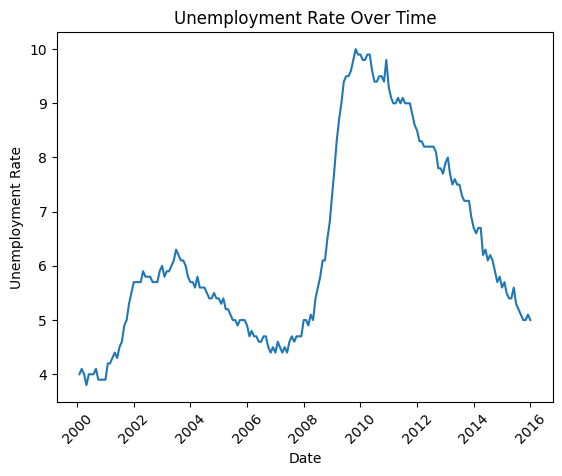

In [ ]:
# prompt: Using dataframe df_unemployment: create a graph for unemployment

import matplotlib.pyplot as plt

# Convert DateTime to datetime objects
df_unemployment['DateTime'] = pd.to_datetime(df_unemployment['DateTime'])

# Create the plot
plt.plot(df_unemployment['DateTime'], df_unemployment['unemployment_rate'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
df_interest = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/interest_rate.csv')
df_interest.rename(columns={'Close': 'interest_rate'}, inplace=True)
df_inflation = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/inflation_rate.csv')
df_inflation.rename(columns={'Close': 'inflation_rate'}, inplace=True)
#

In [ ]:
print(df_interest)
print(df_inflation)

           Country       Category             DateTime  interest_rate  \
0    United States  Interest Rate  2000-01-03T00:00:00           5.50   
1    United States  Interest Rate  2000-02-01T00:00:00           5.50   
2    United States  Interest Rate  2000-02-02T00:00:00           5.75   
3    United States  Interest Rate  2000-03-01T00:00:00           5.75   
4    United States  Interest Rate  2000-03-21T00:00:00           6.00   
..             ...            ...                  ...            ...   
230  United States  Interest Rate  2015-08-31T00:00:00           0.25   
231  United States  Interest Rate  2015-09-17T00:00:00           0.25   
232  United States  Interest Rate  2015-10-28T00:00:00           0.25   
233  United States  Interest Rate  2015-11-30T00:00:00           0.25   
234  United States  Interest Rate  2015-12-16T00:00:00           0.50   

    Frequency HistoricalDataSymbol           LastUpdate  
0       Daily                 FDTR  2011-06-27T00:00:00  
1      

In [ ]:
# prompt: group by month year and average interest rate

# Convert 'DateTime' column to datetime objects if it's not already
df_interest['DateTime'] = pd.to_datetime(df_interest['DateTime'])

# Extract year and month
df_interest['Year'] = df_interest['DateTime'].dt.year
df_interest['Month'] = df_interest['DateTime'].dt.month

# Group by year and month, then calculate the average interest rate
grouped_interest = df_interest.groupby(['Year', 'Month'])['interest_rate'].mean().reset_index()

grouped_interest

,Year,Month,interest_rate
0,2000,1,5.500
1,2000,2,5.625
2,2000,3,5.875
3,2000,4,6.000
4,2000,5,6.250
...,...,...,...
187,2015,8,0.250
188,2015,9,0.250
189,2015,10,0.250
190,2015,11,0.250


In [ ]:
# Convert 'DateTime' column to datetime objects if it's not already
df_inflation['DateTime'] = pd.to_datetime(df_inflation['DateTime'])

# Extract year and month
df_inflation['Year'] = df_inflation['DateTime'].dt.year
df_inflation['Month'] = df_inflation['DateTime'].dt.month

# Group by year and month, then calculate the average inflation rate
grouped_inflation = df_inflation.groupby(['Year', 'Month'])['inflation_rate'].mean().reset_index()

grouped_inflation

,Year,Month,inflation_rate
0,2000,1,2.7
1,2000,2,3.2
2,2000,3,3.8
3,2000,4,3.1
4,2000,5,3.2
...,...,...,...
187,2015,8,0.2
188,2015,9,0.0
189,2015,10,0.2
190,2015,11,0.5


In [ ]:
merged_df_iandi = pd.merge(grouped_inflation, grouped_interest, on=['Year', 'Month'], how='inner')

print(merged_df_iandi)

     Year  Month  inflation_rate  interest_rate
0    2000      1             2.7          5.500
1    2000      2             3.2          5.625
2    2000      3             3.8          5.875
3    2000      4             3.1          6.000
4    2000      5             3.2          6.250
..    ...    ...             ...            ...
187  2015      8             0.2          0.250
188  2015      9             0.0          0.250
189  2015     10             0.2          0.250
190  2015     11             0.5          0.250
191  2015     12             0.7          0.500

[192 rows x 4 columns]


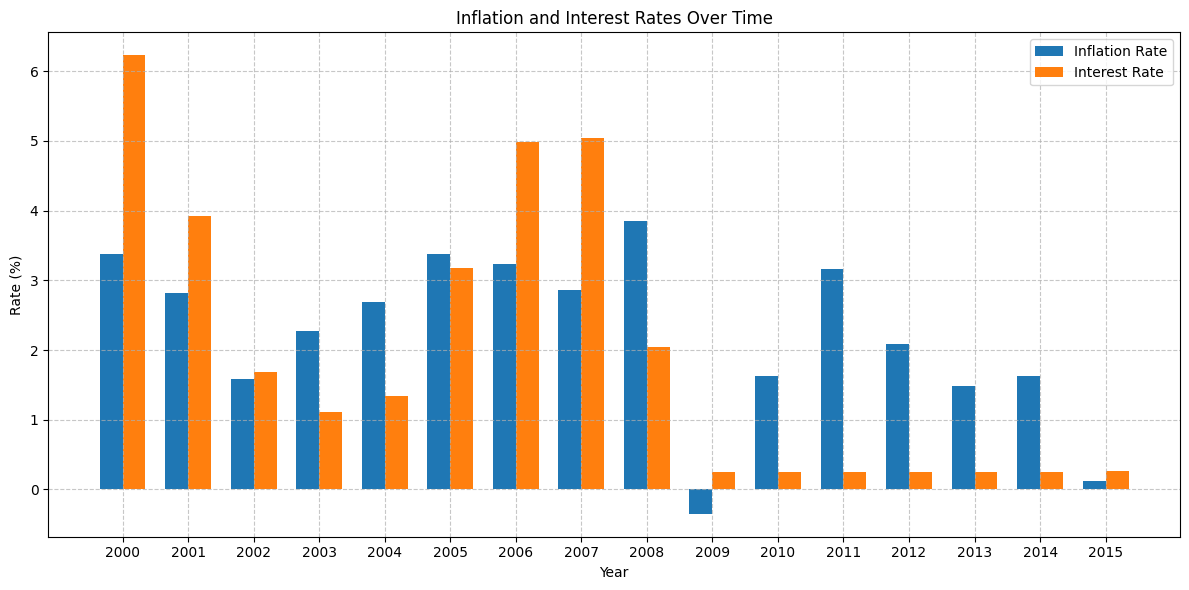

In [ ]:
# prompt: create grouped bar chart with inflation and interest merged data set df_merged_iandi

import matplotlib.pyplot as plt

# Assuming 'df_merged_iandi' is your merged DataFrame with 'Year', 'Month', 'inflation_rate', and 'interest_rate' columns

# Group the data by year for easier plotting
grouped_data = merged_df_iandi.groupby('Year').mean().reset_index()

# Create the grouped bar chart
bar_width = 0.35

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(grouped_data['Year'] - bar_width / 2, grouped_data['inflation_rate'], bar_width, label='Inflation Rate')
plt.bar(grouped_data['Year'] + bar_width / 2, grouped_data['interest_rate'], bar_width, label='Interest Rate')


plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.title('Inflation and Interest Rates Over Time')
plt.xticks(grouped_data['Year'])  # Ensures x-axis ticks are at the year values
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: write merged_df dataset to csv file

merged_df_iandi.to_csv('interest_inflation.csv', index=False)

In [ ]:
df_mortgage = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/mortgage_originations.csv')
df_mortgage.rename(columns={'Close': 'mortgage_total_cost'}, inplace=True)
df_mortgage.head()

,Country,Category,DateTime,mortgage_total_cost,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Mortgage Originations,2003-03-31T00:00:00,968.98,Quarterly,USAMORORI,2023-05-15T18:44:00
1,United States,Mortgage Originations,2003-06-30T00:00:00,1014.55,Quarterly,USAMORORI,2023-05-15T18:44:00
2,United States,Mortgage Originations,2003-09-30T00:00:00,1063.71,Quarterly,USAMORORI,2023-05-15T18:44:00
3,United States,Mortgage Originations,2003-12-31T00:00:00,1028.05,Quarterly,USAMORORI,2023-05-15T18:44:00
4,United States,Mortgage Originations,2004-03-31T00:00:00,656.80,Quarterly,USAMORORI,2023-05-15T18:44:00


In [ ]:
df_30_year = pd.read_csv('/content/drive/MyDrive/Final 209 Datasets/30_year_mortgage_rate.csv')
df_30_year.rename(columns={'Close': '30_year_mortgage_rate'}, inplace=True)
df_30_year.head()

,Country,Category,DateTime,30_year_mortgage_rate,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,30 Year Mortgage Rate,2000-01-06T00:00:00,8.15,Weekly,USA3YMR,2023-05-26T08:54:00
1,United States,30 Year Mortgage Rate,2000-01-13T00:00:00,8.18,Weekly,USA3YMR,2023-05-26T08:54:00
2,United States,30 Year Mortgage Rate,2000-01-20T00:00:00,8.26,Weekly,USA3YMR,2023-05-26T08:54:00
3,United States,30 Year Mortgage Rate,2000-01-27T00:00:00,8.25,Weekly,USA3YMR,2023-05-26T08:54:00
4,United States,30 Year Mortgage Rate,2000-02-03T00:00:00,8.25,Weekly,USA3YMR,2023-05-26T08:54:00
